In [111]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from api_key_container import api_key

In [156]:
url = "https://api.marketstack.com/v1/tickers?access_key=" + api_key
response = requests.get(url)
response_json = response.json()
# print(response_json)

In [157]:
companies = response_json['data']

In [158]:
df = pd.json_normalize(companies, meta=['name'])
# print(df)

In [159]:
url = "https://api.marketstack.com/v1/splits?access_key=" + api_key
querystring = {"symbols":"MSFT"}
response = requests.get(url, params=querystring)
# print(response.json())

In [160]:
url = "https://api.marketstack.com/v1/eod?access_key=" + api_key
querystring = {"symbols":"MSFT","date_from":"2023-12-19", "date_to":"2024-12-19"}
response = requests.get(url, params=querystring)
# print(response.json())

In [161]:
historical_data = response.json()['data']
# historical_data

In [162]:
df = pd.json_normalize(historical_data, meta=['date'])
# df

In [163]:
df['date'] = pd.to_datetime(df['date'])
# df

In [164]:
monthly = df.groupby(pd.Grouper(key='date', freq='M')).mean() 
# monthly

In [165]:
weekly = df.groupby(pd.Grouper(key='date', freq='W')).mean() 
# weekly

In [166]:
def shorten_date(date):
    return date[0:10]

# df['date']
# df['short_date'] = df['date'].apply(shorten_date)
# df

In [167]:
# df.plot('short_date', 'volume', kind='bar')

<AxesSubplot:xlabel='date'>

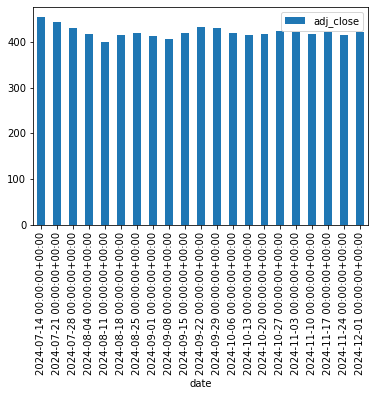

In [124]:
# weekly.plot.bar(x='date', y='adj_close')
# weekly.plot.bar(weekly.index, y='adj_close')
weekly.plot.bar(y='adj_close')

# df.plot.bar('short_date', y='adj_close')
# df.plot.line('short_date', y='adj_high', secondary_y=True)

# plt.xlabel('Date')
# plt.ylabel('Adjusted Price (USD)')
# plt.title('Microsoft EOD Data')

# # plt.legend(title='')
# plt.legend(labels=['Adjusted High Price', 'Adjusted Closing Price'])
# plt.show()

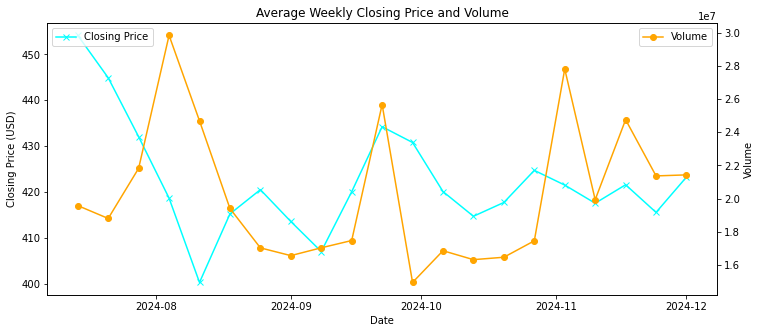

In [125]:
# fig, ax = plt.subplots(figsize=(12,5))
# ax2 = ax.twinx()
# ax.set_title('Closing')
# ax.set_xlabel('Date')
# plt.xticks(rotation=90)
# # ax.xticks(rotation=90)
# ax.plot(df['short_date'], df['adj_close'], color='green', marker='x')
# # ax = df.plot('short_date', 'adj_close', kind='bar')
# ax2.plot(df['short_date'], df['volume'], color='red', marker='o')
# ax.set_ylabel('Closing')
# ax2.set_ylabel('Volume')
# # plt.xticks(rotation=90)
# plt.show()

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Average Weekly Closing Price and Volume')
ax.set_xlabel('Date')
plt.xticks(rotation=90)
plt.plot(kind='bar')
# ax.xticks(rotation=90)
# ax.plot(kind='bar')
ax.plot(weekly['adj_close'], label='Closing Price', color='cyan', marker='x')
# ax = df.plot('short_date', 'adj_close', kind='bar')
ax2.plot(weekly['volume'], label='Volume', color='orange', marker='o')
ax.set_ylabel('Closing Price (USD)')
ax2.set_ylabel('Volume')
# plt.xticks(rotation=90)
# plt.legend()
ax.legend(loc='upper left')
ax2.legend()
plt.show()

In [126]:
# df.plot.line('short_date', 'volume')
# plt.xticks(rotation=90)
# plt.xlabel('Date')
# plt.ylabel('Volume')
# plt.title('Microsoft EOD Data')

# # plt.legend(title='')
# plt.legend(labels=['Volume'])

numbers:
    highest volume
    lowest volume
    highest price
    lowest price
    
over time:
    closing versus opening
    volume
    
averages (over different periods):
    volume
    high
    low
    closing
last week
last month

In [127]:
df

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange,date
0,420.090,424.8800,417.80,423.46,16271900.0,424.8800,417.800,423.46,420.090,16271921.0,1.0,0.0,MSFT,XNAS,2024-11-29 00:00:00+00:00
1,425.105,427.2299,422.02,422.99,18332444.0,427.2299,422.020,422.99,425.105,18332444.0,1.0,0.0,MSFT,XNAS,2024-11-27 00:00:00+00:00
2,419.590,429.0400,418.85,427.99,23439600.0,429.0414,418.850,427.99,419.585,23458889.0,1.0,0.0,MSFT,XNAS,2024-11-26 00:00:00+00:00
3,418.380,421.0800,414.85,418.79,27651300.0,421.0800,414.850,418.79,418.380,27691090.0,1.0,0.0,MSFT,XNAS,2024-11-25 00:00:00+00:00
4,411.370,417.4000,411.06,417.00,24802100.0,417.4000,411.060,417.00,411.365,24814626.0,1.0,0.0,MSFT,XNAS,2024-11-22 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,442.430,444.8500,439.18,443.52,21741478.0,444.8500,439.180,443.52,442.590,21754021.0,1.0,0.0,MSFT,XNAS,2024-07-17 00:00:00+00:00
96,454.220,454.3000,446.66,449.52,17038389.0,454.3000,446.660,449.52,454.220,17175679.0,1.0,0.0,MSFT,XNAS,2024-07-16 00:00:00+00:00
97,453.420,457.2600,451.43,453.96,13621481.0,457.2600,451.430,453.96,453.300,14429447.0,1.0,0.0,MSFT,XNAS,2024-07-15 00:00:00+00:00
98,454.330,456.3600,450.65,453.55,16311300.0,456.3600,450.645,453.55,454.325,16324274.0,1.0,0.0,MSFT,XNAS,2024-07-12 00:00:00+00:00


In [128]:
# highest_volume = round(df['volume'].max(), 0)
# highest_volume

# df['volume'].max()
print('Highest Volume')
int(df['volume'].max())

Highest Volume


55155300

In [129]:
# df[['volume', 'short_date']].sort_values('volume', ascending=False)

In [130]:
print('Lowest Volume')
int(df['volume'].min())

Lowest Volume


13075000

In [131]:
# df[['volume', 'short_date']].sort_values('volume', ascending=True).head(1)

In [133]:
# df[['adj_high', 'short_date']].sort_values('adj_high', ascending=False)

In [134]:
print('Highest Adjusted Price')
df['adj_high'].max()

Highest Adjusted Price


464.78

In [135]:
# df[['adj_high', 'short_date']].sort_values('adj_high', ascending=True).head(1)

In [136]:
print('Lowest Adjusted Price')
df['adj_low'].min()

Lowest Adjusted Price


385.58

In [137]:
# df.plot.line('short_date', y=['adj_open', 'adj_close'])
# plt.xticks(rotation=90)
# plt.xlabel('Date')
# plt.ylabel('Adjusted Price (USD)')
# plt.title('Microsoft EOD Data')
# plt.legend(labels=['Adjusted Opening Price', 'Adjusted Closing Price'])

In [95]:
df['volume'].mean()

20284888.0

In [96]:
df['adj_high'].mean()

425.37820500000015

In [97]:
df['adj_low'].mean()

417.9611310000001

In [98]:
df['adj_close'].mean()

421.5292

In [144]:
# df2 = df.set_index('date')
# df2

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange
date,,,,,,,,,,,,,,
2024-11-29 00:00:00+00:00,420.090,424.8800,417.80,423.46,16271900.0,424.8800,417.800,423.46,420.090,16271921.0,1.0,0.0,MSFT,XNAS
2024-11-27 00:00:00+00:00,425.105,427.2299,422.02,422.99,18332444.0,427.2299,422.020,422.99,425.105,18332444.0,1.0,0.0,MSFT,XNAS
2024-11-26 00:00:00+00:00,419.590,429.0400,418.85,427.99,23439600.0,429.0414,418.850,427.99,419.585,23458889.0,1.0,0.0,MSFT,XNAS
2024-11-25 00:00:00+00:00,418.380,421.0800,414.85,418.79,27651300.0,421.0800,414.850,418.79,418.380,27691090.0,1.0,0.0,MSFT,XNAS
2024-11-22 00:00:00+00:00,411.370,417.4000,411.06,417.00,24802100.0,417.4000,411.060,417.00,411.365,24814626.0,1.0,0.0,MSFT,XNAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-17 00:00:00+00:00,442.430,444.8500,439.18,443.52,21741478.0,444.8500,439.180,443.52,442.590,21754021.0,1.0,0.0,MSFT,XNAS
2024-07-16 00:00:00+00:00,454.220,454.3000,446.66,449.52,17038389.0,454.3000,446.660,449.52,454.220,17175679.0,1.0,0.0,MSFT,XNAS
2024-07-15 00:00:00+00:00,453.420,457.2600,451.43,453.96,13621481.0,457.2600,451.430,453.96,453.300,14429447.0,1.0,0.0,MSFT,XNAS


In [152]:
# df_november = df2.loc['20241101':'20241201']
# df_november = df2.loc['2024-11-27 00:00:00+00:00':'2024-12-27 00:00:00+00:00']
# df_november = df2.loc['2024-11-27 00:00:00+00:00']
# df_november

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange
date,,,,,,,,,,,,,,
2024-11-27 00:00:00+00:00,425.105,427.2299,422.02,422.99,18332444.0,427.2299,422.02,422.99,425.105,18332444.0,1.0,0.0,MSFT,XNAS


In [153]:
# df2.loc[df2['date'].between('2024-11-27','2024-12-15', inclusive=True)]

KeyError: 'date'

In [155]:
df_last_week = df.loc[df['date'].between('2024-11-01','2024-11-30', inclusive=True)]

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange,date
0,420.090,424.8800,417.800,423.46,16271900.0,424.8800,417.8000,423.46,420.090,16271921.0,1.0,0.00,MSFT,XNAS,2024-11-29 00:00:00+00:00
1,425.105,427.2299,422.020,422.99,18332444.0,427.2299,422.0200,422.99,425.105,18332444.0,1.0,0.00,MSFT,XNAS,2024-11-27 00:00:00+00:00
2,419.590,429.0400,418.850,427.99,23439600.0,429.0414,418.8500,427.99,419.585,23458889.0,1.0,0.00,MSFT,XNAS,2024-11-26 00:00:00+00:00
3,418.380,421.0800,414.850,418.79,27651300.0,421.0800,414.8500,418.79,418.380,27691090.0,1.0,0.00,MSFT,XNAS,2024-11-25 00:00:00+00:00
4,411.370,417.4000,411.060,417.00,24802100.0,417.4000,411.0600,417.00,411.365,24814626.0,1.0,0.00,MSFT,XNAS,2024-11-22 00:00:00+00:00
5,419.500,419.7800,410.290,412.87,20745300.0,419.7800,410.2887,412.87,419.500,20780162.0,1.0,0.83,MSFT,XNAS,2024-11-21 00:00:00+00:00
6,416.870,417.2900,410.580,415.49,19166200.0,417.2900,410.5800,414.66,416.870,19191655.0,1.0,0.00,MSFT,XNAS,2024-11-20 00:00:00+00:00
7,413.110,417.9400,411.550,417.79,18111900.0,417.9400,411.5500,417.79,413.110,18133529.0,1.0,0.00,MSFT,XNAS,2024-11-19 00:00:00+00:00
8,414.870,418.4037,412.100,415.76,23983845.0,418.4037,412.1000,415.76,414.870,24742013.0,1.0,0.00,MSFT,XNAS,2024-11-18 00:00:00+00:00
9,419.820,422.8000,413.640,415.00,28196600.0,422.8000,413.6400,415.00,419.820,28247644.0,1.0,0.00,MSFT,XNAS,2024-11-15 00:00:00+00:00
